In [2]:
ENV = 'GOOGLE_COLLAB'

In [3]:
if ENV == "GOOGLE_COLLAB":
  from google.colab import drive
  drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls

drive  sample_data


In [6]:
base_path = "/content/drive/MyDrive/Tec/FJ25/IA/M2/project/dataset"

%cd "/content/drive/MyDrive/Tec/FJ25/IA/M2/project/dataset"
!ls

/content/drive/MyDrive/Tec/FJ25/IA/M2/project/dataset
augmented  labels.csv  test  train  valid


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Data separation

In [8]:
train_dir = 'train'
test_dir = 'test'
validation_dir = 'valid'

In [9]:
print("Contenido de la carpeta TRAIN:")
print(os.listdir(train_dir))  # Esto debe mostrar las categorías dentro de TRAIN

print("Contenido de la carpeta TEST:")
print(os.listdir(test_dir))  # Esto debe mostrar las categorías dentro de TEST

print("Contenido de la carpeta VALIDATION:")
print(os.listdir(validation_dir))  # Esto debe mostrar las categorías dentro de TEST

# También puedes verificar las imágenes dentro de cada subcarpeta:
for category in os.listdir(train_dir):
    category_path = os.path.join(train_dir, category)
    if os.path.isdir(category_path):
        print(f"Imágenes en {category}:")
        print(os.listdir(category_path))  # Lista las imágenes dentro de cada categoría

Contenido de la carpeta TRAIN:
['LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL', 'EOSINOPHIL']
Contenido de la carpeta TEST:
['.DS_Store', 'NEUTROPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'EOSINOPHIL']
Contenido de la carpeta VALIDATION:
['LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL', 'EOSINOPHIL']
Imágenes en LYMPHOCYTE:
['_22_8174.jpeg', '_0_5928.jpeg', '_0_8368.jpeg', '_22_2475.jpeg', '_20_5831.jpeg', '_10_6271.jpeg', '_22_3632.jpeg', '_24_1057.jpeg', '_1_4755.jpeg', '_17_3868.jpeg', '_10_4486.jpeg', '_1_8653.jpeg', '_1_282.jpeg', '_19_1204.jpeg', '_22_1819.jpeg', '_20_2900.jpeg', '_18_6013.jpeg', '_17_1458.jpeg', '_1_7581.jpeg', '_21_6273.jpeg', '_15_5285.jpeg', '_23_9646.jpeg', '_23_3287.jpeg', '_23_2065.jpeg', '_23_7265.jpeg', '_15_2377.jpeg', '_0_3283.jpeg', '_20_956.jpeg', '_20_1464.jpeg', '_19_9121.jpeg', '_22_760.jpeg', '_19_3679.jpeg', '_18_3980.jpeg', '_0_5558.jpeg', '_19_1910.jpeg', '_0_750.jpeg', '_15_3007.jpeg', '_19_9226.jpeg', '_23_6189.jpeg', '_22_8415.jpeg', '_22_48.jpeg', '_23_2744.jpeg', '

## Scaling and pre processing techniques

In [13]:
image_size = (128, 128)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range = 0.3,
    zoom_range=0.3,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=32,
    class_mode='categorical'
)

validation_generator = valid_datagen.flow_from_directory(
    validation_dir,
    target_size=image_size,
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 7540 images belonging to 4 classes.
Found 2493 images belonging to 4 classes.
Found 2497 images belonging to 4 classes.


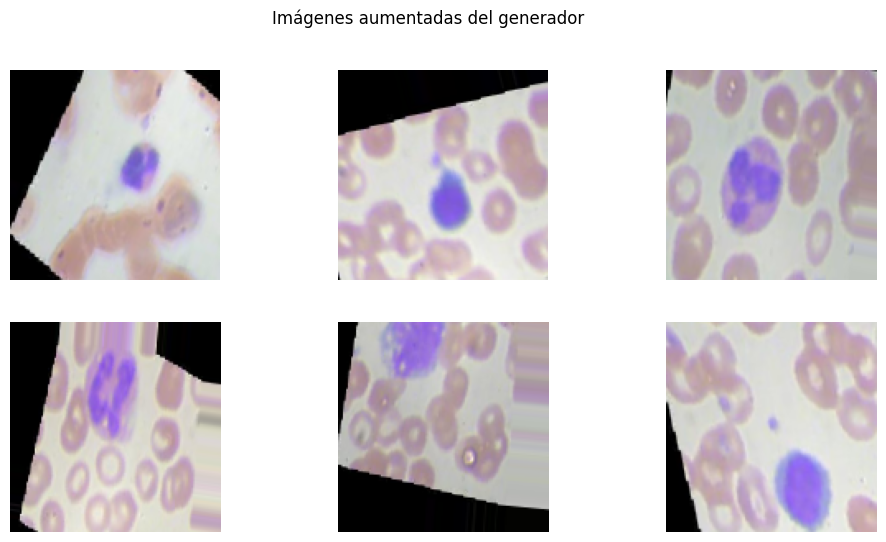

In [14]:
import matplotlib.pyplot as plt

images, _ = next(train_generator)

plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i])
    plt.axis('off')
plt.suptitle("Imágenes aumentadas del generador")
plt.show()